# Plotting and Visualization

Many problems encountered in EE involve processing large amounts of data.  One of the first steps here would be to visualize this data to understand what it looks like and what can be done with it.

In [2]:
# Imports and settings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

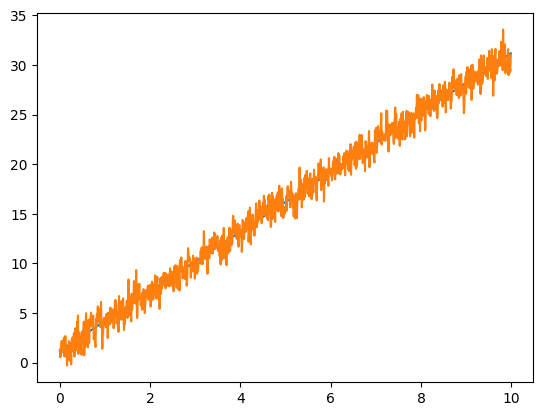

In [2]:
# Create a time base and a straight line fit
t = np.arange(0, 10, 0.01)
def stline(x, m, c):
    return m * x + c
y = stline(t, 3, 1.2)
# Add Gaussian noise
n = 1 * np.random.randn(len(t))
yn = y + n

plt.plot(t, y, t, yn)

<ErrorbarContainer object of 3 artists>

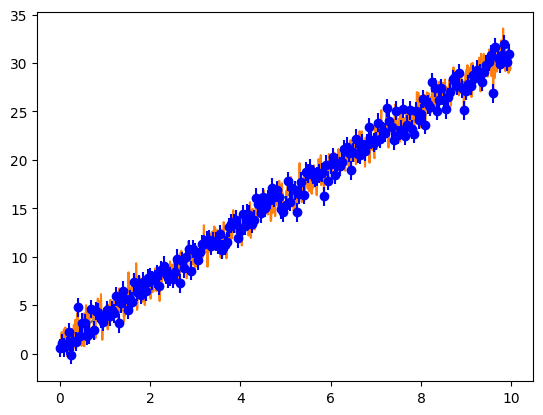

In [3]:
#Get errorbars from noise 
plt.plot(t, y, t, yn)
plt.errorbar(t[::5], yn[::5], np.std(n), fmt='bo')

# Least Squares Curve Fitting

Assume we know something about the function that underlies the observed data (for example, that it is linear or a polynomial function).  However, we don't know the coefficients of the various terms.  For example, say our function takes two parameters $p_1$ and $p_2$, and is a linear function of the time variable $t$: $g(t, p_1, p_2) = p_1 t + p_2$.  

We have a number of *observations* $g_1, g_2, \ldots, g_n$ of this function at different time instants $t_1, t_2, \ldots, t_n$.  These observations can then be written as:

$$
\mathbf{g} \equiv
\begin{pmatrix}
g_1 \\
g_2 \\
\vdots \\
g_n
\end{pmatrix}
=
\begin{pmatrix}
t_1 & 1 \\
t_2 & 1 \\
\vdots & \vdots \\
t_n & 1
\end{pmatrix}
\begin{pmatrix}
p_1 \\
p_2
\end{pmatrix}
\equiv
\mathbf{M}\mathbf{p}
$$

## Mean Square Error
We can therefore define an error $\varepsilon = \mathbf{Mp}-\mathbf{g}$ (note that this is itself a vector of point-wise errors), and a *mean-square error* or MSE as:

$$
E = \varepsilon^T \varepsilon = \sum_{1}^{N} \varepsilon_i = \sum_1^N ((p_1 t_i + p_2) - g_i)^2
$$

The goal of *least squares fitting* is to find the parameters $p_i$ such that this MSE $E$ is minimized.  More details of how this works can be seen at [LibreTexts](https://math.libretexts.org/Bookshelves/Linear_Algebra/Interactive_Linear_Algebra_(Margalit_and_Rabinoff)/06%3A_Orthogonality/6.5%3A_The_Method_of_Least_Squares).

In our case, we can use the `lstsq` function from the `numpy.linalg` library.  For this, we have to construct the $\mathbf{M}$ matrix.

In [4]:
# Use column_stack to put the vectors side by side
M = np.column_stack([t, np.ones(len(t))])
# Use the lstsq function to solve for p_1 and p_2
(p1, p2), _, _, _ = np.linalg.lstsq(M, yn, rcond=None)
print(f"The estimated equation is {p1} t + {p2}")

The estimated equation is 3.005829113276766 t + 1.167025057155706


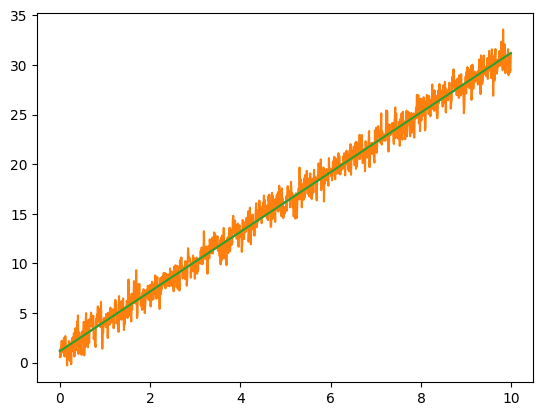

In [5]:
# Plot against the original input and compare
yest = stline(t, p1, p2)
plt.plot(t, y, t, yn, t, yest)

# Non-linear curve fitting

What if your equation was not a linear function of the parameters?  For example:
$$g(t; p_1, p_2) = e^{-p_1 t} + p_2$$

The problem here is that we cannot create the $M$ matrix as a linear combination of $p_1$ and $p_2$!  We still have a notion of MSE:

$$E = \sum_1^N (g(t; p_1, p_2) - z_t)^2$$
where $z_t$ are the observed values.  However, the least squares minimization techniques discussed earlier do not work.  

## `curve_fit`

The `scipy.optimize` library contains the `curve_fit` function that can perform a non-linear curve fitting on observed data.  Unlike the least squares method, here we need to feed in a parametrized function that can be used to estimate the parameters.  

<ErrorbarContainer object of 3 artists>

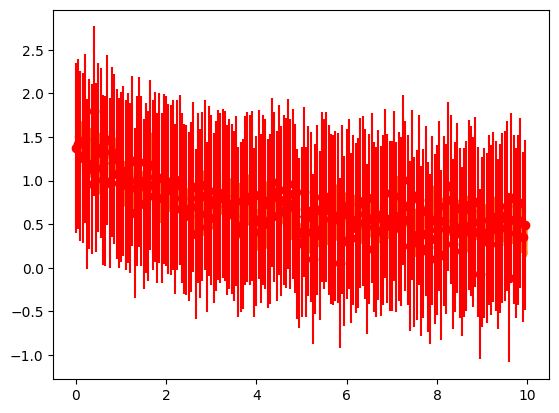

In [6]:
# Create a function with nonlinear dependence on parameters
def nlfunc(t, p1, p2):
    return np.exp(-p1 * t) + p2
z = nlfunc(t, 0.5, 0.5)
# Reuse the same noise - we are lazy
zn = z + 0.2*n
plt.plot(t, z,t,zn)
plt.errorbar(t[::5], zn[::5], np.std(n), fmt='ro')

In [7]:
# Set up the non-linear curve fit
from scipy.optimize import curve_fit
(zp1, zp2), pcov = curve_fit(nlfunc, t, zn)
print(f"Estimated function: exp(-{zp1}t) + {zp2}")

Estimated function: exp(-0.4976981633162676t) + 0.4983411398743385


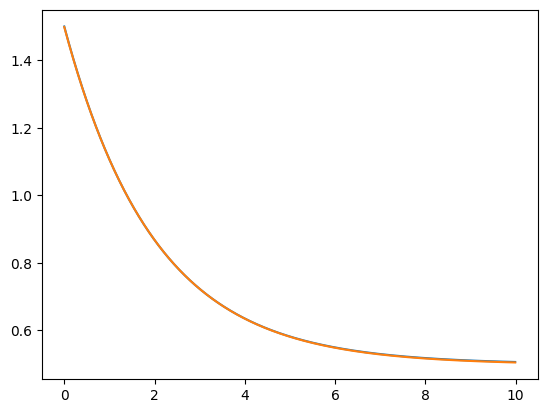

In [8]:
zest = nlfunc(t, zp1, zp2)
plt.plot(t, z, t, zest)

Estimated: 4.963627020526544 * sin(2*pi*0.49761153343240644*t)


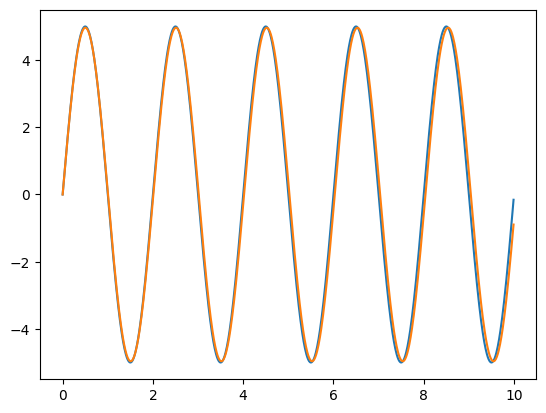

In [9]:
# Non-linear sinusoidal function
def sinfunc(t, p1, p2):
    return p1 * np.sin(2 * np.pi * p2 * t)
s = sinfunc(t, 5, 0.5)
sn = s + 0.2*n
# Fit with only first K points
K = 100
(sp1, sp2), _ = curve_fit(sinfunc, t[:K], sn[:K])
print(f"Estimated: {sp1} * sin(2*pi*{sp2}*t)")
# Regenerate data
sest = sinfunc(t, sp1, sp2)
plt.plot(t, s, t, sest)

# Assignment

- You are given several data sets in text format.  For each of them:
  - Plot the data along with errorbars - explain how you obtain the size of the errorbars.
  - Propose a possible best curve fit for each of the data sets.  The exact nature of the function is not given, but some clues may be available.  
  - Perform a curve fitting using appropriate techniques for each of the data.  You need to explain whether you are choosing to use a linear or nonlinear curve fit, and why it is the right approach.  Comment on the accuracy of your approach and whether it gives a good result, or something better could have been done.
- For the straight line fit from the example above, compare the time taken, and accuracy of the fit, for `lstsq` *vs* `curve_fit`.  Comment on your observations.

# Datasheet 1 


- Plotting of data with errorbars and Estimating the best fit for the given data from the clue given

Text(0, 0.5, 'Y')

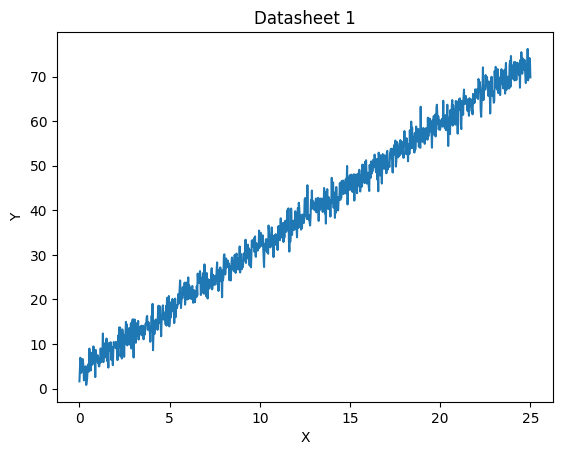

In [20]:
import matplotlib.pyplot as plt
import numpy as np


X = []
Y = []



with open('dataset1.txt', 'r') as dataset:
     content = [line.strip().split() for line in dataset]
    
     for r in content:
        X = np.array([float(r[0]) for r in content])
        Y = np.array([float(r[1]) for r in content])

plt.plot(X, Y)
plt.title('Datasheet 1')
plt.xlabel('X')
plt.ylabel('Y')


We have extracted the data from the given data sheet 1 by stripping the lines and then again splitting the lines we then store the 1st value of each line in numpy array X and the 2nd element in the numpy array Y and then plot it using matplotlib function's plt.plot method

We can see clearly from the Graph ploted above that the Y is a linear function of X thus the given function of dataset 1 is a straight line

# Estimation of the funtion

Linear Estimation

The estimated equation is 2.791124245414918 t + 3.848800101430742
31 µs ± 1.59 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Text(0, 0.5, 'Y')

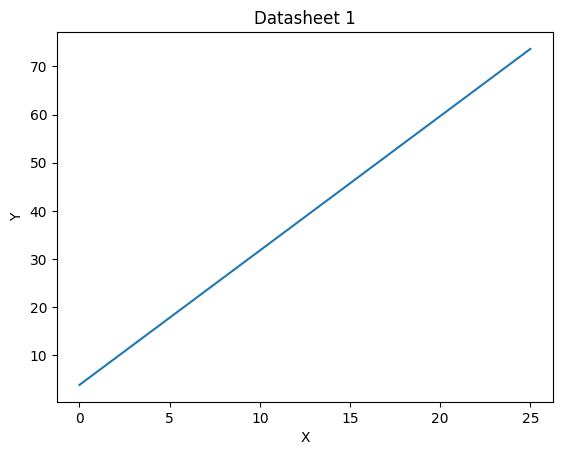

In [22]:
# Use column_stack to put the vectors side by side
M = np.column_stack([X, np.ones(len(X))])
# Use the lstsq function to solve for p_1 and p_2
(m,c), _, _, _ = np.linalg.lstsq(M, Y, rcond=None)
print(f"The estimated equation is {m} t + {c}")
%timeit np.linalg.lstsq(M,Y,rcond=None)
plt.plot(X,m*X+c)
plt.title('Datasheet 1')
plt.xlabel('X')
plt.ylabel('Y')

Since the curve is a linear curve so linear curvefit of the graph will take less time and will be more efficient 
we use lstsq function from the numpy.linalg library to find the estimation of the graph parameters it works well here as it involves only parameters

Non-linear function estimation

Estimated function: 2.7911242448201588x + 3.848800111263445


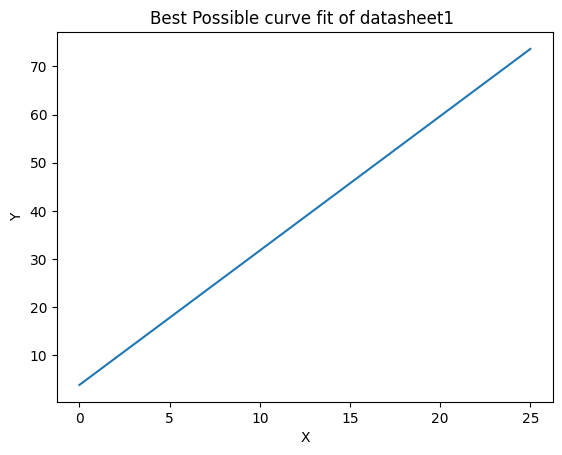

256 µs ± 9.19 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


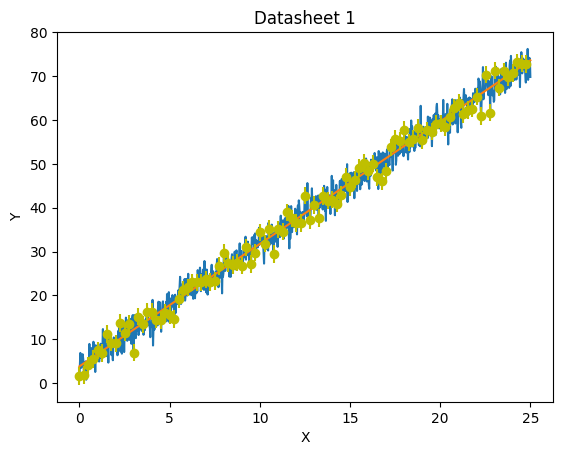

In [23]:
from scipy.optimize import curve_fit

def stl(X,slope,constant):
    return slope*X+constant

(m,c), pcov = curve_fit(stl,X,Y)
print(f"Estimated function: {m}x + {c}")
slope=float(m)
A = []
for x in X:
    A.append(stl(x,slope,c))
plt.plot(X,A)
plt.title('Best Possible curve fit of datasheet1 ')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()
plt.plot(X,Y,X,A)
plt.title('Datasheet 1')
plt.xlabel('X')
plt.ylabel('Y')

plt.errorbar(X[::10], Y[::10],np.std(Y-A), fmt='yo')
%timeit curve_fit(stl,X,Y)

    we will estimate the error of the value of Y given in the dataset with the value of Y here A that we found by finding the best fit for the given values this will give us the noise that was added with the A value, we plot error for every 1 out of 10 x values
    - curve_fit function takes more value than the lstsq function as curve_fitting works for non linear curve fitting 

# Dataset 2

Plotting of the Dataset2 # fourier transform

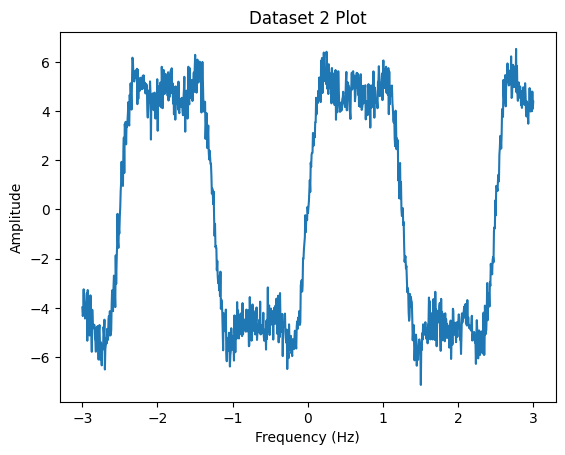

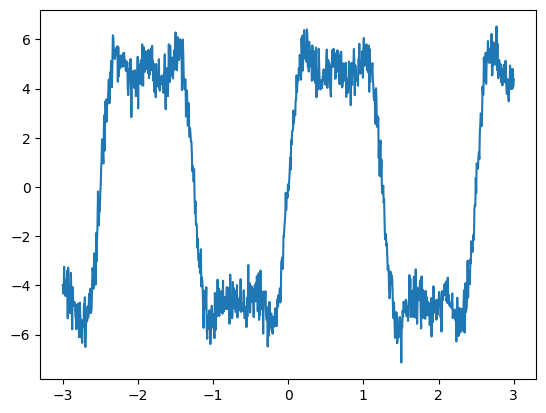

In [24]:
import matplotlib.pyplot as plt


X = []
Y = []

with open('dataset2.txt', 'r') as dataset:
     content = [line.strip().split() for line in dataset]
    
     for r in content:
        X = np.array([float(r[0]) for r in content])
        Y = np.array([float(r[1]) for r in content])

plt.plot(X, Y,label='data')
plt.title('Dataset 2 Plot')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()
plt.plot(X,Y)

We have plot the value of Amplitude Y wrt X ie frequency of the fourier transform,


In [25]:
from scipy.optimize import curve_fit
import numpy as np

def fourier(x, f):
    sum = 0
    for i in range(1, 6, 2):
        sum += (20/ (np.pi * i)) * np.sin(i * x * f * np.pi / 1.25)
    return sum


# Call the curve_fit function
f, pcov = curve_fit(fourier, X, Y, maxfev=1000)

# Print the estimated value of f
print(f"Estimated value of f = {f}")


Estimated value of f = [0.99947664]


The above graph is a fourier tranform of a square wave and we know the formula of the transform we have amplitude of the square wave is 5 and the L value= 1.25 that is the length of square wave and f is the fundamental frequency of the wave we use curvefit function here as it is a nonlinear plot  

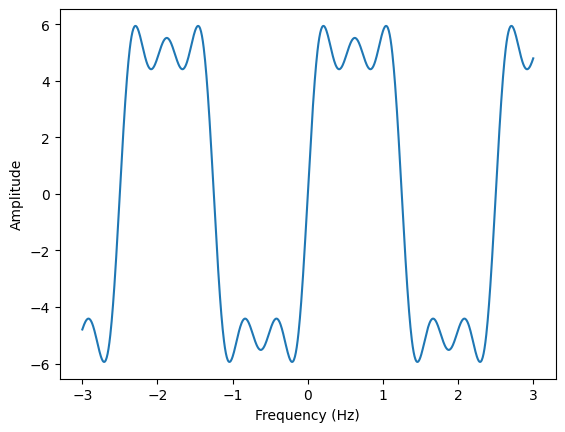

<ErrorbarContainer object of 3 artists>

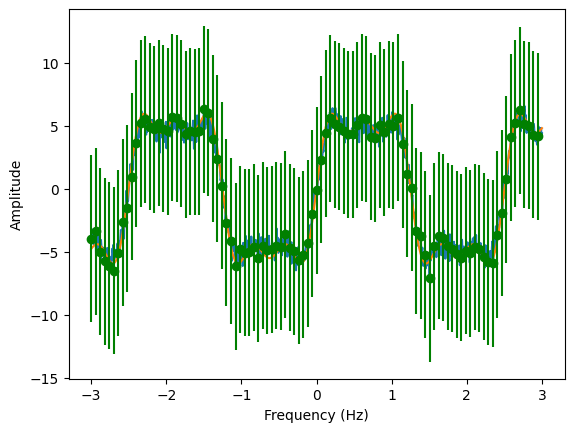

In [27]:
A = []
for x in X:
    A.append(fourier(f,x))
plt.plot(X,A)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()
plt.plot(X,Y,X,A)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.errorbar(X[::10], Y[::10],np.std(Y-A), fmt='go',label='error bar')

we plot here the error bar for the Y function vs A

# Dataset 3

Planck's Law

Text(0, 0.5, 'Y')

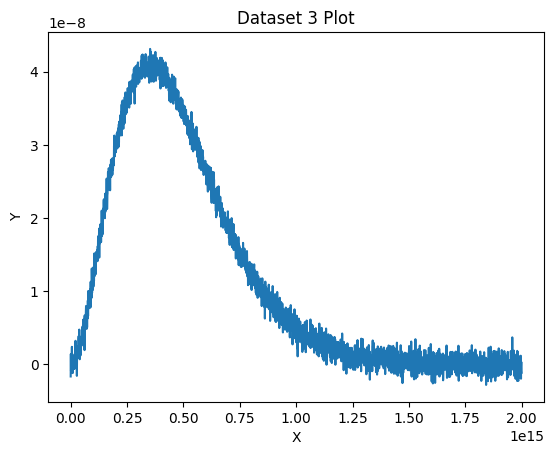

In [31]:
import matplotlib.pyplot as plt
X = []
Y = []

with open('dataset3.txt', 'r') as dataset:
     content = [line.strip().split() for line in dataset]
    
     for r in content:
        X = np.array([float(r[0]) for r in content])
        Y = np.array([float(r[1]) for r in content])
plt.plot(X, Y)
plt.title('Dataset 3 Plot')
plt.xlabel('X')
plt.ylabel('Y')

In [32]:
import numpy as np

# Constants
k = 1.38e-23
c = 3.0e8


# Define the Planck function
def planck(x, h, T):
    return (2*h*x**3/c**2) * 1/(np.exp(h*x/(k*T))-1)


#call the curve fit function
popt, pcov = curve_fit(planck, X, Y, p0=[6.626e-34, 5000])
h= popt[0]
T= popt[1]


print("Best-fit values:")
print(f"h ={h} Jsec")
print(f"T ={T} K")


Best-fit values:
h =6.643229758754323e-34 Jsec
T =6011.36152171352 K


Its a non linear function so we use curve_fit function we have to guess the value of h and T 1st and as we know their value range we chosed as such and then calculated h and T

<ErrorbarContainer object of 3 artists>

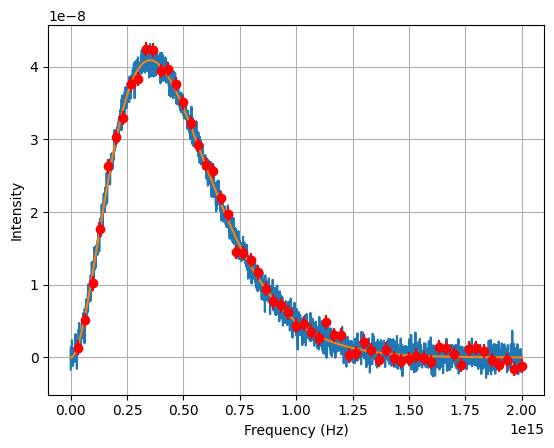

In [34]:
A = []
plt.xlabel("Frequency (Hz)")
plt.ylabel("Intensity")
plt.grid()
for x in X:
    A.append(planck(x,h,T))
plt.plot(X,Y,X,A)

plt.errorbar(X[::50], Y[::50],np.std(Y-A), fmt='ro')


# Dataset4

<ErrorbarContainer object of 3 artists>

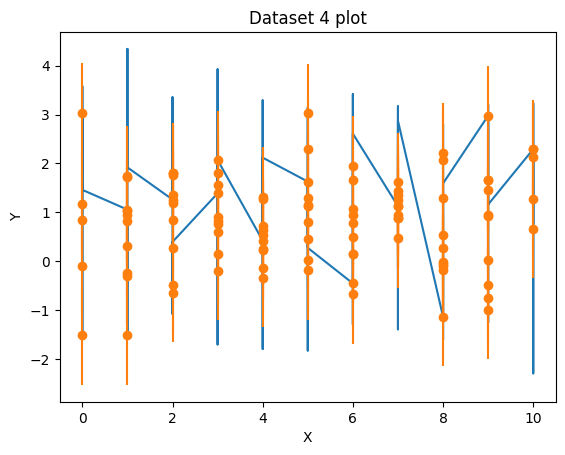

In [36]:
import matplotlib.pyplot as plt
X = []
Y = []

with open('dataset4.txt', 'r') as dataset:
     content = [line.strip().split() for line in dataset]
    
     for r in content:
        X = np.array([float(r[0]) for r in content])
        Y = np.array([float(r[1]) for r in content])

plt.plot(X, Y)
plt.title('Dataset 4 plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.errorbar(X[::10], Y[::10],np.std(Y), fmt='o')


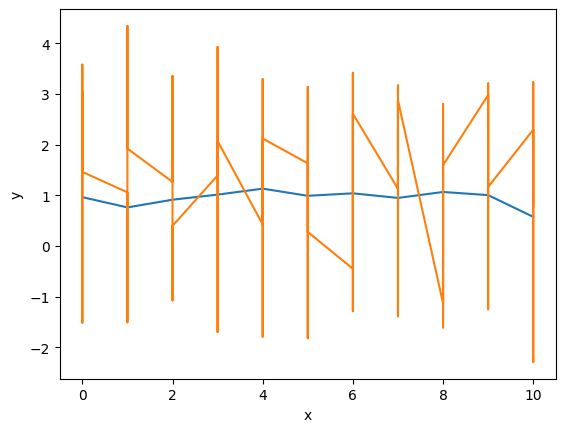

In [37]:
s = [0] * 11  # initialize sum with 10 elements, all set to zero
A=[0,1,2,3,4,5,6,7,8,9,10]
for i in range(50):
    s[0] += Y[i]  # add each element of Y to the first element of sum
s[0]=s[0]/50

for i in range(50,150):
    s[1]+= Y[i]
s[1]=s[1]/100    
for i in range(150,250):
    s[2]+= Y[i] 
s[2]=s[2]/100 
for i in range(250,350):
    s[3]+= Y[i]
s[3]=s[3]/100 
for i in range(350,450):
    s[4]+= Y[i]
s[4]=s[4]/100 
for i in range(450,550):
    s[5]+= Y[i]
s[5]=s[5]/100 
for i in range(550,650):
    s[6]+= Y[i]
s[6]=s[6]/100 
for i in range(650,750):
    s[7]+= Y[i]
s[7]=s[7]/100 
for i in range(750,850):
    s[8]+= Y[i]
s[8]=s[8]/100 
for i in range(850,950):
    s[9]+= Y[i]
s[9]=s[9]/100 
for i in range(950,1000):
    s[10]+= Y[i]
s[10]=s[10]/100 
plt.xlabel("x")
plt.ylabel("y")
plt.plot(A,s,X,Y)



I have taken